In [1]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

In [2]:
def on_cell(check_list,p):
    ans=[] #state of each neighbour (order = left,right,down,up)
    boundry=[0,0,0,0] #the overall state of all neighbours in boundary list
    for i in range(len(check_list)):
        if check_list[i]==0 :
            a=np.random.rand()#assign a probablity to each neighbour and check if its state can be 'on'
            if a<p :
                ans.append(1)#the cell's state is 'on'
                boundry[i]=1 #this cell is 'on'
            if a>=p :
                ans.append(2) #the cell's state is 'off'
        elif check_list[i]==1 :#if all cells are already 'on'
            ans.append(1)
        else:
            ans.append(2)
    return ans,boundry

Please Enter Your Intended Length :2000
Please Enter Your Intended Probability :0.59
creation time : 22.882649100000002


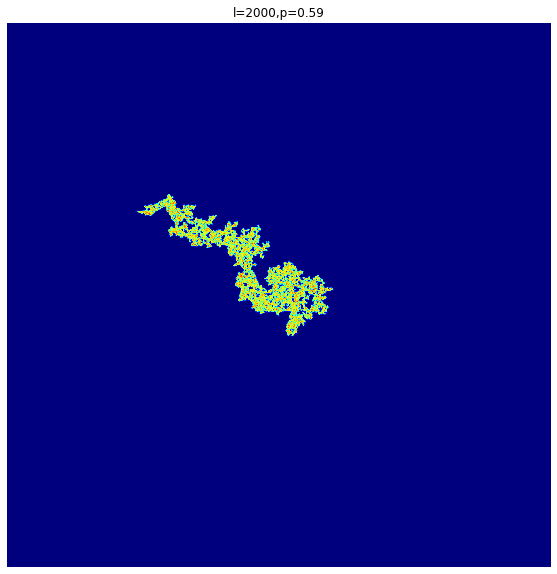

In [4]:
start=timeit.default_timer()
l=int(input('Please Enter Your Intended Length :'))
p=float(input('Please Enter Your Intended Probability :'))
s=np.zeros((l+2,l+2))
for i in range(l+2):
    s[0][i]=2
    s[i][l+1]=2
    s[i][0]=2
    s[l+1][i]=2
x0=int(l/2)#start from centre
y0=int(l/2)#start from centre
s[x0][y0]=1 #centre is 'on'
x=[x0]#coordinate of the first 'on' cells
y=[y0]#coordinate of the first 'on' cells
while len(x)!=0 :
        ans,boundry=on_cell([s[x[0]][y[0]-1],s[x[0]][y[0]+1],s[x[0]+1][y[0]],s[x[0]-1][y[0]]],p)#check all 4 neighbours
        s[x[0]][y[0]-1]=ans[0]#left neighbour  --> state = ans ('on' = 1, 'off'=2 )
        s[x[0]][y[0]+1]=ans[1]#right neighbour --> state = ans ('on' = 1, 'off'=2 )
        s[x[0]+1][y[0]]=ans[2]#down neighbour  --> state = ans ('on' = 1, 'off'=2 )
        s[x[0]-1][y[0]]=ans[3]#up neighbour   -->  state = ans ('on' = 1, 'off'=2 )
        if boundry[0]==1: #if this cell is 'on' its coordinates are added to x-y list for coordinates of 'on' cells
            x.append(x[0])
            y.append(y[0]-1)
        if boundry[1]==1: #if this cell is 'on' its coordinates are added to x-y list for coordinates of 'on' cells
            x.append(x[0])
            y.append(y[0]+1)
        if boundry[2]==1: #if this cell is 'on' its coordinates are added to x-y list for coordinates of 'on' cells
            x.append(x[0]+1)
            y.append(y[0])
        if boundry[3]==1: #if this cell is 'on' its coordinates are added to x-y list for coordinates of 'on' cells
            x.append(x[0]-1)
            y.append(y[0])
        x.remove(x[0])
        y.remove(y[0])
lattice=np.zeros((l,l))
for i in range(1,l+1):
    for j in range(1,l+1):
        if s[i][j]==2:
            s[i][j]=0
        lattice[i-1][j-1]=s[i][j] 
        
fig = plt.figure(figsize=(15,10))         
plt.title('l=2000,p=0.59')        
plt.imshow(lattice,cmap='jet')
plt.axis('off')
stop=timeit.default_timer()
print('creation time :',stop-start)  

In [5]:
start=timeit.default_timer()
run=150 #150 runs for l=2000 & p=0.59
r1=[]
p=0.59
area=[] 
for j in range(run):
    s=np.zeros((l+2,l+2))
    for i in range(l+2):
        s[0][i]=2
        s[i][l+1]=2
        s[i][0]=2
        s[l+1][i]=2
    x0=int(l/2)
    y0=int(l/2)
    s[x0][y0]=1 #centre is 'on'
    x=[x0]
    y=[y0]
    xx=[x0]
    yy=[y0]
    area_counter=1
    while len(x)!=0 :
        ans,boundry=on_cell([s[x[0]][y[0]-1],s[x[0]][y[0]+1],s[x[0]+1][y[0]],s[x[0]-1][y[0]]],p)
        s[x[0]][y[0]-1]=ans[0]
        s[x[0]][y[0]+1]=ans[1]
        s[x[0]+1][y[0]]=ans[2]
        s[x[0]-1][y[0]]=ans[3]
        if boundry[0]==1:
            x.append(x[0])
            y.append(y[0]-1)
            xx.append(x[0])
            yy.append(y[0]-1)
            area_counter+=1 #counting the surface of 'on' cells (s)
        if boundry[1]==1:
            x.append(x[0])
            y.append(y[0]+1)
            xx.append(x[0])
            yy.append(y[0]+1)
            area_counter+=1
        if boundry[2]==1:
            x.append(x[0]+1)
            y.append(y[0])
            xx.append(x[0]+1)
            yy.append(y[0])
            area_counter+=1
        if boundry[3]==1:
            x.append(x[0]-1)
            y.append(y[0])
            xx.append(x[0]-1)
            yy.append(y[0])
            area_counter+=1
        x.remove(x[0])
        y.remove(y[0])
    x_cm=int(sum(xx)/area_counter) #x-centre of mass
    y_cm=int(sum(yy)/area_counter) #y-centre of mass
    d=[]
    for i in range(len(xx)):
        d.append((xx[i]-x_cm)**2+(yy[i]-y_cm)**2) #distance from centre of mass(squard)
    I=sum(d)
    if I!=0 :
        r1.append(np.sqrt(I/area_counter))
        area.append(area_counter)
stop=timeit.default_timer()
print('creation time :',stop-start) 

creation time : 465.0690515


gradiant  1.8697123851370854
creation time : 0.03566469999987021


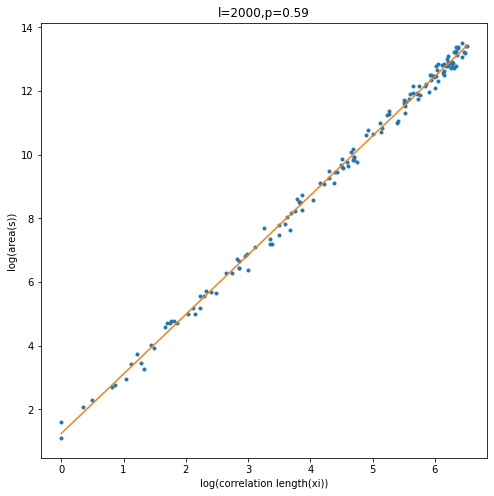

In [6]:
#log(s) - log(xi) ploting
start=timeit.default_timer()
fig = plt.figure(figsize=(8,8))
rr1=np.log(np.array(r1))
aa=np.log(np.array(area))
plt.plot(rr1,aa,'.')
plt.title('l=2000,p=0.59')
plt.xlabel('log(correlation length(xi))')
plt.ylabel('log(area(s))')
z=np.polyfit(rr1,aa,1)
print('gradiant ',z[0])
xs=[min(rr1),max(rr1)]
ys=[xs[0]*z[0]+z[1],xs[1]*z[0]+z[1]]
plt.plot(xs,ys)
stop=timeit.default_timer()
print('creation time :',stop-start) 

Please Enter Your Intended Length :2000
Please Enter Your Intended Probability :0.55
creation time : 10.370941799999855


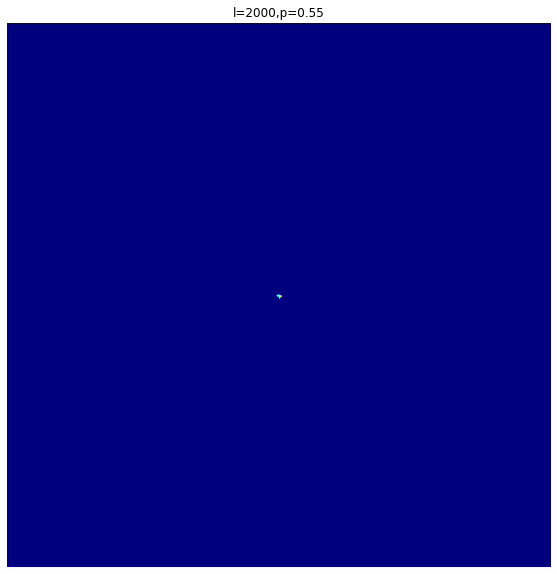

In [7]:
start=timeit.default_timer()
l=int(input('Please Enter Your Intended Length :'))
p=float(input('Please Enter Your Intended Probability :'))
s=np.zeros((l+2,l+2))
for i in range(l+2):
    s[0][i]=2
    s[i][l+1]=2
    s[i][0]=2
    s[l+1][i]=2
x0=int(l/2)
y0=int(l/2)
s[x0][y0]=1
x=[x0]
y=[y0]
while len(x)!=0 :
        ans,boundry=on_cell([s[x[0]][y[0]-1],s[x[0]][y[0]+1],s[x[0]+1][y[0]],s[x[0]-1][y[0]]],p)
        s[x[0]][y[0]-1]=ans[0]
        s[x[0]][y[0]+1]=ans[1]
        s[x[0]+1][y[0]]=ans[2]
        s[x[0]-1][y[0]]=ans[3]
        if boundry[0]==1:
            x.append(x[0])
            y.append(y[0]-1)
        if boundry[1]==1:
            x.append(x[0])
            y.append(y[0]+1)
        if boundry[2]==1:
            x.append(x[0]+1)
            y.append(y[0])
        if boundry[3]==1:
            x.append(x[0]-1)
            y.append(y[0])
        x.remove(x[0])
        y.remove(y[0])
lattice=np.zeros((l,l))
for i in range(1,l+1):
    for j in range(1,l+1):
        if s[i][j]==2:
            s[i][j]=0
        lattice[i-1][j-1]=s[i][j] 
        
fig = plt.figure(figsize=(15,10))         
plt.title('l=2000,p=0.55')        
plt.imshow(lattice,cmap='jet') 
plt.axis('off')
stop=timeit.default_timer()
print('creation time :',stop-start)  

In [8]:
start=timeit.default_timer()
run=150 #150 runs for l=2000 & p=0.55
r2=[]
p=0.55
area=[]
for j in range(run):
    s=np.zeros((l+2,l+2))
    for i in range(l+2):
        s[0][i]=2
        s[i][l+1]=2
        s[i][0]=2
        s[l+1][i]=2
    x0=int(l/2)
    y0=int(l/2)
    s[x0][y0]=1
    x=[x0]
    y=[y0]
    xx=[x0]
    yy=[y0]
    area_counter=1
    while len(x)!=0 :
        ans,boundry=on_cell([s[x[0]][y[0]-1],s[x[0]][y[0]+1],s[x[0]+1][y[0]],s[x[0]-1][y[0]]],p)
        s[x[0]][y[0]-1]=ans[0]
        s[x[0]][y[0]+1]=ans[1]
        s[x[0]+1][y[0]]=ans[2]
        s[x[0]-1][y[0]]=ans[3]
        if boundry[0]==1:
            x.append(x[0])
            y.append(y[0]-1)
            xx.append(x[0])
            yy.append(y[0]-1)
            area_counter+=1
        if boundry[1]==1:
            x.append(x[0])
            y.append(y[0]+1)
            xx.append(x[0])
            yy.append(y[0]+1)
            area_counter+=1
        if boundry[2]==1:
            x.append(x[0]+1)
            y.append(y[0])
            xx.append(x[0]+1)
            yy.append(y[0])
            area_counter+=1
        if boundry[3]==1:
            x.append(x[0]-1)
            y.append(y[0])
            xx.append(x[0]-1)
            yy.append(y[0])
            area_counter+=1
        x.remove(x[0])
        y.remove(y[0])
    x_cm=int(sum(xx)/area_counter)
    y_cm=int(sum(yy)/area_counter)
    d=[]
    for i in range(len(xx)):
        d.append((xx[i]-x_cm)**2+(yy[i]-y_cm)**2)
    I=sum(d)
    if I!=0 :
        r2.append(np.sqrt(I/area_counter))
        area.append(area_counter)
stop=timeit.default_timer()
print('creation time :',stop-start) 

creation time : 1.3519168999998783


gradiant  1.79144478002634
creation time : 0.013692300000002433


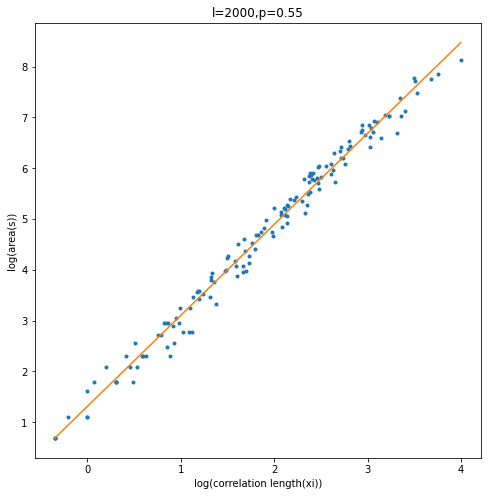

In [9]:
#log(s) - log(xi) ploting
start=timeit.default_timer()
fig = plt.figure(figsize=(8,8))
rr2=np.log(np.array(r2))
aa=np.log(np.array(area))
plt.plot(rr2,aa,'.')
plt.title('l=2000,p=0.55')
plt.xlabel('log(correlation length(xi))')
plt.ylabel('log(area(s))')
z=np.polyfit(rr2,aa,1)
print('gradiant ',z[0])
xs=[min(rr2),max(rr2)]
ys=[xs[0]*z[0]+z[1],xs[1]*z[0]+z[1]]
plt.plot(xs,ys)
stop=timeit.default_timer()
print('creation time :',stop-start) 

Please Enter Your Intended Length :2000
Please Enter Your Intended Probability :0.5
creation time : 8.652102100000093


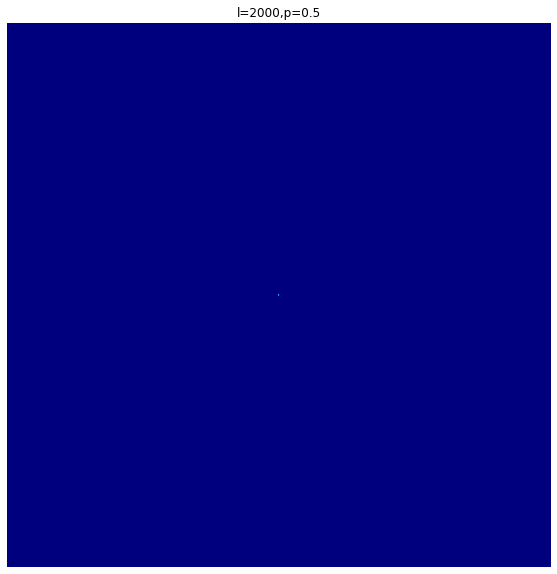

In [11]:
start=timeit.default_timer()
l=int(input('Please Enter Your Intended Length :'))
p=float(input('Please Enter Your Intended Probability :'))
s=np.zeros((l+2,l+2))
for i in range(l+2):
    s[0][i]=2
    s[i][l+1]=2
    s[i][0]=2
    s[l+1][i]=2
x0=int(l/2)
y0=int(l/2)
s[x0][y0]=1
x=[x0]
y=[y0]
while len(x)!=0 :
        ans,boundry=on_cell([s[x[0]][y[0]-1],s[x[0]][y[0]+1],s[x[0]+1][y[0]],s[x[0]-1][y[0]]],p)
        s[x[0]][y[0]-1]=ans[0]
        s[x[0]][y[0]+1]=ans[1]
        s[x[0]+1][y[0]]=ans[2]
        s[x[0]-1][y[0]]=ans[3]
        if boundry[0]==1:
            x.append(x[0])
            y.append(y[0]-1)
        if boundry[1]==1:
            x.append(x[0])
            y.append(y[0]+1)
        if boundry[2]==1:
            x.append(x[0]+1)
            y.append(y[0])
        if boundry[3]==1:
            x.append(x[0]-1)
            y.append(y[0])
        x.remove(x[0])
        y.remove(y[0])
lattice=np.zeros((l,l))
for i in range(1,l+1):
    for j in range(1,l+1):
        if s[i][j]==2:
            s[i][j]=0
        lattice[i-1][j-1]=s[i][j] 
        
fig = plt.figure(figsize=(15,10))         
plt.title('l=2000,p=0.5')        
plt.imshow(lattice,cmap='jet')
plt.axis('off')
stop=timeit.default_timer()
print('creation time :',stop-start)  

In [12]:
start=timeit.default_timer()
run=150 #150 runs for l=2000 & p=0.55
p=0.5
r3=[]
area=[]
for j in range(run):
    s=np.zeros((l+2,l+2))
    for i in range(l+2):
        s[0][i]=2
        s[i][l+1]=2
        s[i][0]=2
        s[l+1][i]=2
    x0=int(l/2)
    y0=int(l/2)
    s[x0][y0]=1
    x=[x0]
    y=[y0]
    xx=[x0]
    yy=[y0]
    area_counter=1
    while len(x)!=0 :
        ans,boundry=on_cell([s[x[0]][y[0]-1],s[x[0]][y[0]+1],s[x[0]+1][y[0]],s[x[0]-1][y[0]]],p)
        s[x[0]][y[0]-1]=ans[0]
        s[x[0]][y[0]+1]=ans[1]
        s[x[0]+1][y[0]]=ans[2]
        s[x[0]-1][y[0]]=ans[3]
        if boundry[0]==1:
            x.append(x[0])
            y.append(y[0]-1)
            area_counter+=1
            xx.append(x[0])
            yy.append(y[0]-1)
        if boundry[1]==1:
            x.append(x[0])
            y.append(y[0]+1)
            xx.append(x[0])
            yy.append(y[0]+1)
            area_counter+=1
        if boundry[2]==1:
            x.append(x[0]+1)
            y.append(y[0])
            area_counter+=1
            xx.append(x[0]+1)
            yy.append(y[0])
        if boundry[3]==1:
            x.append(x[0]-1)
            y.append(y[0])
            area_counter+=1
            xx.append(x[0]-1)
            yy.append(y[0])
        x.remove(x[0])
        y.remove(y[0])
    x_cm=int(sum(xx)/area_counter)
    y_cm=int(sum(yy)/area_counter)
    d=[]
    for i in range(len(xx)):
        d.append((xx[i]-x_cm)**2+(yy[i]-y_cm)**2)
    I=sum(d)
    if I!=0 :
        r3.append(np.sqrt(I/area_counter))
        area.append(area_counter)
stop=timeit.default_timer()
print('creation time :',stop-start) 

creation time : 0.9351282000000083


gradiant  1.764823511583055
creation time : 0.020768800000041665


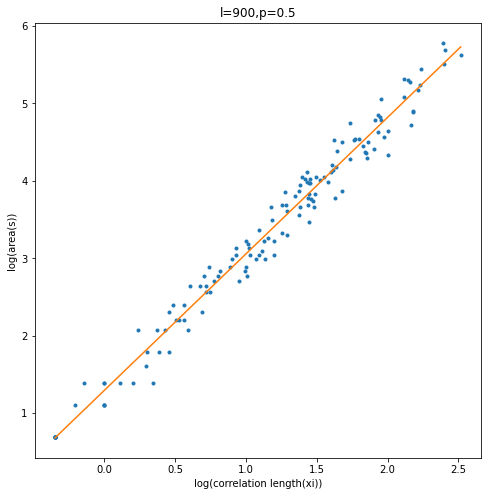

In [13]:
#log(s) - log(xi) ploting for p=0.5
start=timeit.default_timer()
fig = plt.figure(figsize=(8,8))
rr3=np.log(np.array(r3))
aa=np.log(np.array(area))
plt.plot(rr3,aa,'.')
plt.title('l=2000,p=0.5') #درشکل اشتباه نوشته شده l=900
plt.xlabel('log(correlation length(xi))')
plt.ylabel('log(area(s))')
z=np.polyfit(rr3,aa,1)
print('gradiant ',z[0])
xs=[min(rr3),max(rr3)]
ys=[xs[0]*z[0]+z[1],xs[1]*z[0]+z[1]]
plt.plot(xs,ys)
stop=timeit.default_timer()
print('creation time :',stop-start) 

creation time : 0.012261800000032963


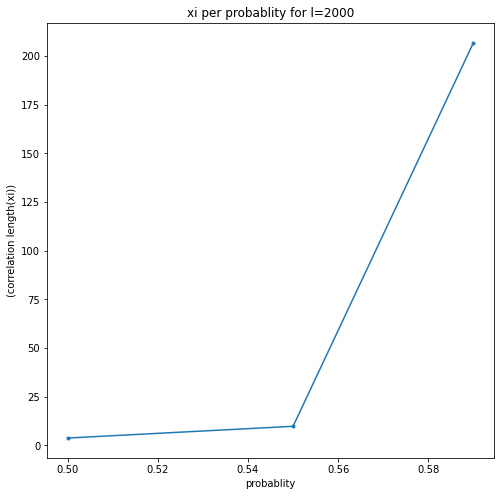

In [15]:
#correlation length - p ploting
start=timeit.default_timer()
R1 = sum(r1)/run #p=0.59
R2 = sum(r2)/run #p=0.55
R3 = sum(r3)/run #p=0.50
R = [R3,R2,R1] #correlation length in each probablity
P = [0.50,0.55,0.59]
fig = plt.figure(figsize=(8,8))
plt.plot(P,R,'.-')
plt.title('xi per probablity for l=2000')
plt.xlabel('probablity')
plt.ylabel('(correlation length(xi))')
stop=timeit.default_timer()
print('creation time :',stop-start) 

In [16]:
  start=timeit.default_timer()
run=150 #150 runs for l=2000 & p=0.59
r1=[]
p=0.59
area1=[]
l=2000
for j in range(run):
    s=np.zeros((l+2,l+2))
    for i in range(l+2):
        s[0][i]=2
        s[i][l+1]=2
        s[i][0]=2
        s[l+1][i]=2
    x0=int(l/2)
    y0=int(l/2)
    s[x0][y0]=1 #centre is 'on'
    x=[x0]
    y=[y0]
    xx=[x0]
    yy=[y0]
    area_counter1=1
    while len(x)!=0 :
        ans,boundry=on_cell([s[x[0]][y[0]-1],s[x[0]][y[0]+1],s[x[0]+1][y[0]],s[x[0]-1][y[0]]],p)
        s[x[0]][y[0]-1]=ans[0]
        s[x[0]][y[0]+1]=ans[1]
        s[x[0]+1][y[0]]=ans[2]
        s[x[0]-1][y[0]]=ans[3]
        if boundry[0]==1:
            x.append(x[0])
            y.append(y[0]-1)
            xx.append(x[0])
            yy.append(y[0]-1)
            area_counter1+=1 #counting the surface of 'on' cells (s)
        if boundry[1]==1:
            x.append(x[0])
            y.append(y[0]+1)
            xx.append(x[0])
            yy.append(y[0]+1)
            area_counter1+=1
        if boundry[2]==1:
            x.append(x[0]+1)
            y.append(y[0])
            xx.append(x[0]+1)
            yy.append(y[0])
            area_counter1+=1
        if boundry[3]==1:
            x.append(x[0]-1)
            y.append(y[0])
            xx.append(x[0]-1)
            yy.append(y[0])
            area_counter1+=1
        x.remove(x[0])
        y.remove(y[0])
    x_cm=int(sum(xx)/area_counter1) #x-centre of mass
    y_cm=int(sum(yy)/area_counter1) #y-centre of mass
    d=[]
    for i in range(len(xx)):
        d.append((xx[i]-x_cm)**2+(yy[i]-y_cm)**2) #distance from centre of mass(squard)
    I=sum(d)
    if I!=0 :
        r1.append(np.sqrt(I/area_counter1))
        area1.append(area_counter1)
stop=timeit.default_timer()
print('creation time :',stop-start) 

creation time : 534.5886937000032


In [17]:
start=timeit.default_timer()
run=150 #150 runs for l=2000 & p=0.57
r2=[]
l=2000
p=0.57
area2=[]
for j in range(run):
    s=np.zeros((l+2,l+2))
    for i in range(l+2):
        s[0][i]=2
        s[i][l+1]=2
        s[i][0]=2
        s[l+1][i]=2
    x0=int(l/2)
    y0=int(l/2)
    s[x0][y0]=1
    x=[x0]
    y=[y0]
    xx=[x0]
    yy=[y0]
    area_counter2=1
    while len(x)!=0 :
        ans,boundry=on_cell([s[x[0]][y[0]-1],s[x[0]][y[0]+1],s[x[0]+1][y[0]],s[x[0]-1][y[0]]],p)
        s[x[0]][y[0]-1]=ans[0]
        s[x[0]][y[0]+1]=ans[1]
        s[x[0]+1][y[0]]=ans[2]
        s[x[0]-1][y[0]]=ans[3]
        if boundry[0]==1:
            x.append(x[0])
            y.append(y[0]-1)
            xx.append(x[0])
            yy.append(y[0]-1)
            area_counter2+=1
        if boundry[1]==1:
            x.append(x[0])
            y.append(y[0]+1)
            xx.append(x[0])
            yy.append(y[0]+1)
            area_counter2+=1
        if boundry[2]==1:
            x.append(x[0]+1)
            y.append(y[0])
            xx.append(x[0]+1)
            yy.append(y[0])
            area_counter2+=1
        if boundry[3]==1:
            x.append(x[0]-1)
            y.append(y[0])
            xx.append(x[0]-1)
            yy.append(y[0])
            area_counter2+=1
        x.remove(x[0])
        y.remove(y[0])
    x_cm=int(sum(xx)/area_counter2)
    y_cm=int(sum(yy)/area_counter2)
    d=[]
    for i in range(len(xx)):
        d.append((xx[i]-x_cm)**2+(yy[i]-y_cm)**2)
    I=sum(d)
    if I!=0 :
        r2.append(np.sqrt(I/area_counter2))
        area2.append(area_counter2)
stop=timeit.default_timer()
print('creation time :',stop-start) 

creation time : 13.536970599998313


In [18]:
start=timeit.default_timer()
run=150 #150 runs for l=2000 & p=0.55
r3=[]
l=2000
p=0.55
area3=[]
for j in range(run):
    s=np.zeros((l+2,l+2))
    for i in range(l+2):
        s[0][i]=2
        s[i][l+1]=2
        s[i][0]=2
        s[l+1][i]=2
    x0=int(l/2)
    y0=int(l/2)
    s[x0][y0]=1
    x=[x0]
    y=[y0]
    xx=[x0]
    yy=[y0]
    area_counter3=1
    while len(x)!=0 :
        ans,boundry=on_cell([s[x[0]][y[0]-1],s[x[0]][y[0]+1],s[x[0]+1][y[0]],s[x[0]-1][y[0]]],p)
        s[x[0]][y[0]-1]=ans[0]
        s[x[0]][y[0]+1]=ans[1]
        s[x[0]+1][y[0]]=ans[2]
        s[x[0]-1][y[0]]=ans[3]
        if boundry[0]==1:
            x.append(x[0])
            y.append(y[0]-1)
            xx.append(x[0])
            yy.append(y[0]-1)
            area_counter3+=1
        if boundry[1]==1:
            x.append(x[0])
            y.append(y[0]+1)
            xx.append(x[0])
            yy.append(y[0]+1)
            area_counter3+=1
        if boundry[2]==1:
            x.append(x[0]+1)
            y.append(y[0])
            xx.append(x[0]+1)
            yy.append(y[0])
            area_counter3+=1
        if boundry[3]==1:
            x.append(x[0]-1)
            y.append(y[0])
            xx.append(x[0]-1)
            yy.append(y[0])
            area_counter3+=1
        x.remove(x[0])
        y.remove(y[0])
    x_cm=int(sum(xx)/area_counter3)
    y_cm=int(sum(yy)/area_counter3)
    d=[]
    for i in range(len(xx)):
        d.append((xx[i]-x_cm)**2+(yy[i]-y_cm)**2)
    I=sum(d)
    if I!=0 :
        r3.append(np.sqrt(I/area_counter3))
        area3.append(area_counter3)
stop=timeit.default_timer()
print('creation time :',stop-start) 

creation time : 5.5893111000041245


In [20]:
start=timeit.default_timer()
run=150 #150 runs for l=2000 & p=0.53
r4=[]
l=2000
p=0.53
area4=[]
for j in range(run):
    s=np.zeros((l+2,l+2))
    for i in range(l+2):
        s[0][i]=2
        s[i][l+1]=2
        s[i][0]=2
        s[l+1][i]=2
    x0=int(l/2)
    y0=int(l/2)
    s[x0][y0]=1
    x=[x0]
    y=[y0]
    xx=[x0]
    yy=[y0]
    area_counter4=1
    while len(x)!=0 :
        ans,boundry=on_cell([s[x[0]][y[0]-1],s[x[0]][y[0]+1],s[x[0]+1][y[0]],s[x[0]-1][y[0]]],p)
        s[x[0]][y[0]-1]=ans[0]
        s[x[0]][y[0]+1]=ans[1]
        s[x[0]+1][y[0]]=ans[2]
        s[x[0]-1][y[0]]=ans[3]
        if boundry[0]==1:
            x.append(x[0])
            y.append(y[0]-1)
            xx.append(x[0])
            yy.append(y[0]-1)
            area_counter4+=1
        if boundry[1]==1:
            x.append(x[0])
            y.append(y[0]+1)
            xx.append(x[0])
            yy.append(y[0]+1)
            area_counter4+=1
        if boundry[2]==1:
            x.append(x[0]+1)
            y.append(y[0])
            xx.append(x[0]+1)
            yy.append(y[0])
            area_counter4+=1
        if boundry[3]==1:
            x.append(x[0]-1)
            y.append(y[0])
            xx.append(x[0]-1)
            yy.append(y[0])
            area_counter4+=1
        x.remove(x[0])
        y.remove(y[0])
    x_cm=int(sum(xx)/area_counter4)
    y_cm=int(sum(yy)/area_counter4)
    d=[]
    for i in range(len(xx)):
        d.append((xx[i]-x_cm)**2+(yy[i]-y_cm)**2)
    I=sum(d)
    if I!=0 :
        r4.append(np.sqrt(I/area_counter4))
        area4.append(area_counter4)
stop=timeit.default_timer()
print('creation time :',stop-start) 

creation time : 3.947655999996641


In [21]:
start=timeit.default_timer()
run=150 #150 runs for l=2000 & p=0.50
r5=[]
l=2000
p=0.50
area5=[]
for j in range(run):
    s=np.zeros((l+2,l+2))
    for i in range(l+2):
        s[0][i]=2
        s[i][l+1]=2
        s[i][0]=2
        s[l+1][i]=2
    x0=int(l/2)
    y0=int(l/2)
    s[x0][y0]=1
    x=[x0]
    y=[y0]
    xx=[x0]
    yy=[y0]
    area_counter5=1
    while len(x)!=0 :
        ans,boundry=on_cell([s[x[0]][y[0]-1],s[x[0]][y[0]+1],s[x[0]+1][y[0]],s[x[0]-1][y[0]]],p)
        s[x[0]][y[0]-1]=ans[0]
        s[x[0]][y[0]+1]=ans[1]
        s[x[0]+1][y[0]]=ans[2]
        s[x[0]-1][y[0]]=ans[3]
        if boundry[0]==1:
            x.append(x[0])
            y.append(y[0]-1)
            xx.append(x[0])
            yy.append(y[0]-1)
            area_counter5+=1
        if boundry[1]==1:
            x.append(x[0])
            y.append(y[0]+1)
            xx.append(x[0])
            yy.append(y[0]+1)
            area_counter5+=1
        if boundry[2]==1:
            x.append(x[0]+1)
            y.append(y[0])
            xx.append(x[0]+1)
            yy.append(y[0])
            area_counter5+=1
        if boundry[3]==1:
            x.append(x[0]-1)
            y.append(y[0])
            xx.append(x[0]-1)
            yy.append(y[0])
            area_counter5+=1
        x.remove(x[0])
        y.remove(y[0])
    x_cm=int(sum(xx)/area_counter5)
    y_cm=int(sum(yy)/area_counter5)
    d=[]
    for i in range(len(xx)):
        d.append((xx[i]-x_cm)**2+(yy[i]-y_cm)**2)
    I=sum(d)
    if I!=0 :
        r5.append(np.sqrt(I/area_counter5))
        area5.append(area_counter5)
stop=timeit.default_timer()
print('creation time :',stop-start) 

creation time : 3.416804200001934


gradiant  1.9963599872736346
creation time : 0.4000536000021384


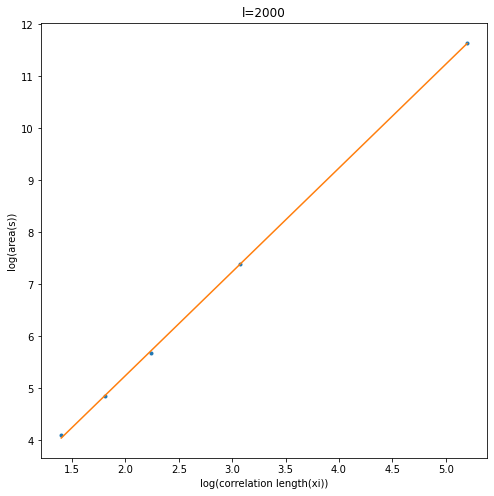

In [22]:
#log(s) - log(xi) ploting (average value in 150 runs for p=0.59,0.57,0.55,0.53,0.50)
start=timeit.default_timer()
R1 = sum(r1)/run #p=0.59
R2 = sum(r2)/run #p=0.57
R3 = sum(r3)/run #p=0.55
R4 = sum(r4)/run #p=0.53
R5 = sum(r5)/run #p=0.50
R = [R5,R4,R3,R2,R1]
A1 = sum(area1)/run #p=0.59
A2 = sum(area2)/run #p=0.57
A3 = sum(area3)/run #p=0.55
A4 = sum(area4)/run #p=0.53
A5 = sum(area5)/run #p=0.50
A = [A5,A4,A3,A2,A1]
RR=np.log(np.array(R))
AA=np.log(np.array(A))
fig = plt.figure(figsize=(8,8))
plt.plot(RR,AA,'.')
plt.title('l=2000')
plt.xlabel('log(correlation length(xi))')
plt.ylabel('log(area(s))')
z=np.polyfit(RR,AA,1)
print('gradiant ',z[0])
xs=[min(RR),max(RR)]
ys=[xs[0]*z[0]+z[1],xs[1]*z[0]+z[1]]
plt.plot(xs,ys)
stop=timeit.default_timer()
print('creation time :',stop-start) 